In [1]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

## Dữ liệu ảnh  

📦 Tổng số ảnh trong thư mục: 2750

📊 Số lượng ảnh theo nhãn:
Not Fall (0): 1035
Fall     (1): 1715

📊 Số lượng ảnh theo hậu tố:
suffix
gốc         550
_blurred    550
_bright     550
_flipped    550
_rotated    550
Name: count, dtype: int64

📐 Kích thước ảnh phổ biến:
   width  height  count
0     96      96   2750


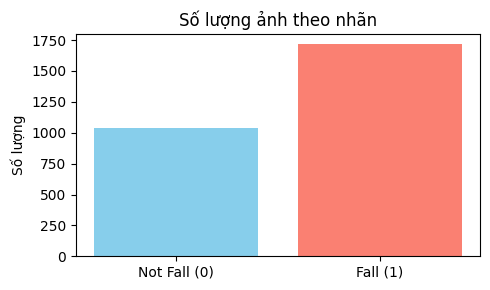

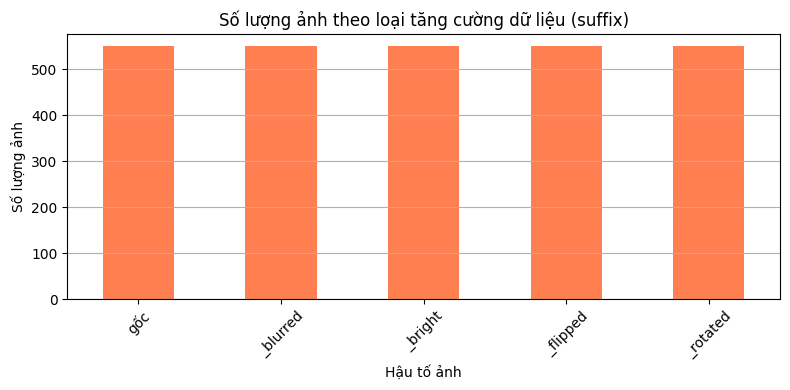

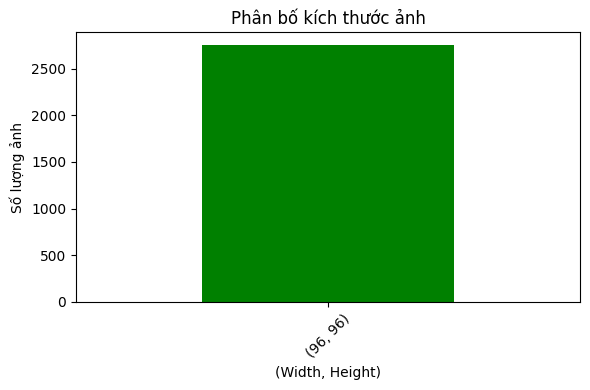

In [ ]:
# Đường dẫn thư mục chứa ảnh
folder = r"E:\NCKH\Data\fall_dataset\img_train"
filenames = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp'))]

print(f"📦 Tổng số ảnh trong thư mục: {len(filenames)}")

# Tạo danh sách chứa thông tin
data = []

for fname in filenames:
    # Đọc ảnh để lấy kích thước
    path = os.path.join(folder, fname)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue
    h, w = img.shape

    # Xác định nhãn
    fname_lower = fname.lower()
    label = 1 if fname_lower.startswith("fall") else (0 if fname_lower.startswith("not fallen") else None)

    # Xác định hậu tố (suffix)
    parts = os.path.splitext(fname)[0].split('_')
    suffix = f"_{parts[-1]}" if len(parts) > 1 else "gốc"

    if label is not None:
        data.append({
            'filename': fname,
            'label': label,
            'suffix': suffix,
            'width': w,
            'height': h
        })

# Tạo DataFrame
df = pd.DataFrame(data)

# ✅ Thống kê nhãn
label_counts = df['label'].value_counts().sort_index()
print("\n📊 Số lượng ảnh theo nhãn:")
print(f"Not Fall (0): {label_counts[0]}")
print(f"Fall     (1): {label_counts[1]}")   

# ✅ Thống kê hậu tố
print("\n📊 Số lượng ảnh theo hậu tố:")
print(df['suffix'].value_counts())

# ✅ Thống kê kích thước ảnh
print("\n📐 Kích thước ảnh phổ biến:")
print(df.groupby(['width', 'height']).size().reset_index(name='count').sort_values('count', ascending=False))

# === Trực quan hóa ===

# 1. Biểu đồ nhãn
plt.figure(figsize=(5, 3))
plt.bar(['Not Fall (0)', 'Fall (1)'], label_counts, color=['skyblue', 'salmon'])
plt.title("Số lượng ảnh theo nhãn")
plt.ylabel("Số lượng")
plt.tight_layout()
plt.show()

# 2. Biểu đồ hậu tố
plt.figure(figsize=(8, 4))
df['suffix'].value_counts().plot(kind='bar', color='coral')
plt.title("Số lượng ảnh theo loại tăng cường dữ liệu (suffix)")
plt.xlabel("Hậu tố ảnh")
plt.ylabel("Số lượng ảnh")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Biểu đồ kích thước ảnh
plt.figure(figsize=(6, 4))
df.groupby(['width', 'height']).size().plot(kind='bar', color='green')
plt.title("Phân bố kích thước ảnh")
plt.ylabel("Số lượng ảnh")
plt.xlabel("(Width, Height)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Dữ liệu dán nhãn cho ảnh 

### Kiểm tra tổng số dòng

In [3]:
import pandas as pd
df = pd.read_csv(r"E:/NCKH/Data/fall_dataset/image_labels.csv")
print("Tổng số dòng trong CSV:", len(df))

Tổng số dòng trong CSV: 2750


### Kiểm tra nhãn hợp lệ

In [4]:
print("Các giá trị nhãn duy nhất:", df['label'].unique())

Các giá trị nhãn duy nhất: [1 0]


###  Kiểm tra số lượng ảnh mỗi nhãn

label
1    1715
0    1035
Name: count, dtype: int64


<Axes: title={'center': 'Phân bố nhãn fall / not fall'}, xlabel='label'>

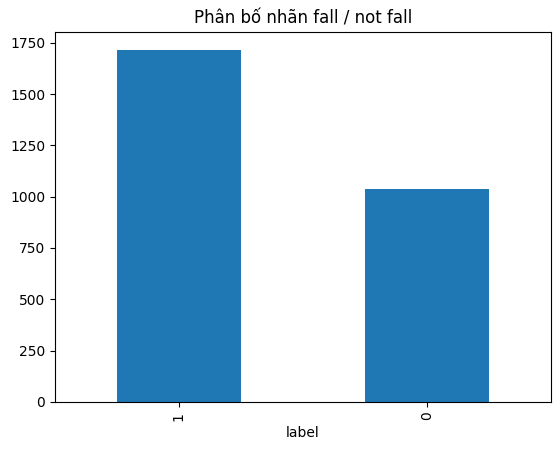

In [5]:
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar', title='Phân bố nhãn fall / not fall')

###  Kiểm tra ảnh trùng (filename bị lặp lại)

In [6]:
dups = df['filename'].duplicated().sum()
print(f"Số dòng trùng tên ảnh: {dups}")

Số dòng trùng tên ảnh: 0
